In [1]:
from __future__ import print_function, division, absolute_import
from collections import Counter
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import matplotlib.pyplot as plt
import time

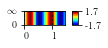

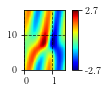

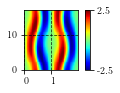

In [37]:
td = read_tileset("../data/ks/tiles.h5", (0, 1, 2), ("default/double_streak", "default/defect", "default/wiggle"))
td[0].plot()
td[1].plot()
td[2].plot()

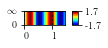

In [40]:
td[0].resize(16, td[0].m).plot()

In [33]:
from orbithunter.gluing import rediscretize_tileset, generate_symbol_arrays

In [34]:
td = rediscretize_tileset(td, new_shape=(16,16))
td

{0: EquilibriumOrbitKS({"shape": [16, 16], "basis": "field", "parameters": [0.0, 13.02, 0.0]}),
 1: RelativeOrbitKS({"shape": [16, 16], "basis": "field", "parameters": [17.151, 13.02, -3.313]}),
 2: AntisymmetricOrbitKS({"shape": [16, 16], "basis": "field", "parameters": [17.151, 17.591, 0.0]})}

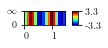

In [35]:
td[0].plot()

In [36]:
tile_dictionary[0].state.max()

3.32953898484415

In [15]:
glue_shape = (3, 3)
symbol_arrays = generate_symbol_arrays(tile_dictionary, glue_shape=glue_shape, unique=True)

In [16]:
tiling_example = tile(symbol_arrays[0], tile_dictionary, OrbitKS)

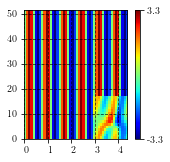

In [17]:
tiling_example.plot()

In [18]:
X = []
symbol_y = []
converge_y = []
for sa in symbol_arrays:
    tiling = tile(sa, td, OrbitKS).reshape(32,32)
    X.append(tiling.state)
    symbol_counter = Counter(sa.ravel().tolist())
    symbol_y.append([symbol_counter[0]/sa.size, symbol_counter[1]/sa.size, symbol_counter[2]/sa.size])
X = np.array(X)
X = np.reshape(X, (*X.shape, 1))
y = np.array(symbol_y)

AttributeError: OrbitKS has no attribute'reshape'

In [ ]:
X.shape, y.shape

If we use a softmax layer, the output can be interpreted as a probability, which means that the total is conserved, such that if we multiply by the number of symbols we can get back an estimate that conserves the number of tiles.  

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, Activation
from sklearn.model_selection import train_test_split

X = (X - X.mean()) / X.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sample_size = X.shape[0]

cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=8, padding='valid', input_shape=X.shape[1:]
               ))
cnn.add(AveragePooling2D(pool_size=2))
cnn.add(Activation('relu'))

cnn.add(Conv2D(filters=8, kernel_size=8,
               padding='valid'
               ))
cnn.add(AveragePooling2D(pool_size=2))
cnn.add(Activation('relu'))
cnn.add(Flatten())
cnn.add(Dense(int(X[0].size)))
cnn.add(Dense(y.shape[1], activation='softmax'))
cnn.compile(loss='mse', optimizer='adam')

In [21]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        2080      
_________________________________________________________________
average_pooling2d_2 (Average (None, 12, 12, 32)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 8)           16392     
_________________________________________________________________
average_pooling2d_3 (Average (None, 2, 2, 8)           0         
_________________________________________________________________
activation_3 (Activation)    (None, 2, 2, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)               

In [22]:
history = cnn.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, epochs=100)

Train on 1740 samples, validate on 436 samples
Epoch 1/100
1740/1740 [==============================] - 2s 863us/sample - loss: 0.0091 - val_loss: 0.0030
Epoch 2/100
1740/1740 [==============================] - 1s 680us/sample - loss: 0.0022 - val_loss: 0.0015
Epoch 3/100
1740/1740 [==============================] - 1s 670us/sample - loss: 0.0011 - val_loss: 8.0942e-04
Epoch 4/100
1740/1740 [==============================] - 1s 665us/sample - loss: 7.2007e-04 - val_loss: 6.6843e-04
Epoch 5/100
1740/1740 [==============================] - 1s 660us/sample - loss: 5.6733e-04 - val_loss: 4.8849e-04
Epoch 6/100
1740/1740 [==============================] - 1s 659us/sample - loss: 4.7993e-04 - val_loss: 3.9542e-04
Epoch 7/100
1740/1740 [==============================] - 1s 656us/sample - loss: 4.1252e-04 - val_loss: 4.4289e-04
Epoch 8/100
1740/1740 [==============================] - 1s 662us/sample - loss: 3.7735e-04 - val_loss: 3.0750e-04
Epoch 9/100
1740/1740 [==============================

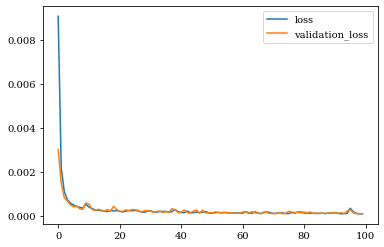

In [51]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False

_ = plt.plot(history.history['loss'])
_ = plt.plot(history.history['val_loss'])
_ = plt.legend(('loss', 'validation_loss'))
_ = plt.show()

In [52]:
example_orbit_ = read_h5('OrbitKS_L37p297_T79p783.h5')

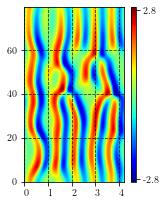

In [53]:
example_orbit_.plot()

In [54]:
example_orbit_ = example_orbit_.reshape(32,32)

In [55]:
print('Example L:', example_orbit_.L, 'Sum_L for Tiles', td[0].L + td[1].L + td[2].L)

Example L: 37.29708818660391 Sum_L for Tiles 37.001204621116116


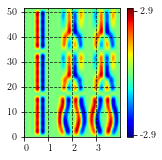

In [46]:
guess_symbol_array = np.array([[0,1,1],[0,1,1],[0,2,2]])
approximate_tiling = tile(guess_symbol_array, td, OrbitKS).reshape(32, 32)
approximate_tiling.plot()

In [47]:
np.matrix(guess_symbol_array)

matrix([[0, 1, 1],
        [0, 1, 1],
        [0, 2, 2]])

In [48]:
test_converge_result = converge(approximate_tiling.transform(to='modes'),
                                method='hybrid',
                                comp_time='thorough',
                                preconditioning=True,
                                pexp=(1,4))
test_tiling = test_converge_result.orbit

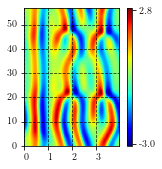

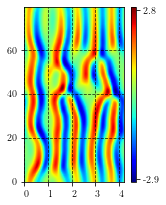

(None, None)

In [50]:
test_tiling.plot(), example_orbit_.plot()

In [67]:
prediction_for_test = cnn.predict(test_tiling.transform(to='field').state.reshape(1, 32, 32, 1))
np.round(prediction_for_test * sa.size)

array([[4., 3., 2.]], dtype=float32)

In [68]:
prediction_for_target = cnn.predict(example_orbit_.transform(to='field').state.reshape(1, 32, 32, 1))
np.round(prediction_for_target * sa.size)

array([[1., 4., 4.]], dtype=float32)

In [69]:
prediction_for_target_reflection = cnn.predict(example_orbit_.transform(to='field').reflection().state.reshape(1, 32, 32, 1))
np.round(prediction_for_target_reflection * sa.size)

array([[4., 3., 1.]], dtype=float32)

In [73]:
predictions = []
for n in range(32):
    for m in range(32):
        prediction_for_target_roll = cnn.predict(np.roll(np.roll(example_orbit_.transform(to='field').state,
                                                                 m,axis=1),n,axis=0).reshape(1, 32, 32, 1))
        predictions.extend(np.round(prediction_for_target_roll * sa.size))
        
predictions = np.array(predictions).reshape(-1, 3)

(array([  3.,  55., 241.,   0., 329., 260.,   0., 114.,  18.,   4.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ],
       dtype=float32),
 <a list of 10 Patch objects>)

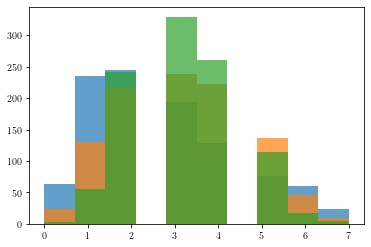

In [82]:
predictions
plt.hist(predictions[:, 0], alpha=0.7)
plt.hist(predictions[:, 1], alpha=0.7)
plt.hist(predictions[:, 2], alpha=0.7)

In [78]:
np.round(np.mean(predictions, axis=0))

array([3., 3., 3.], dtype=float32)

In [79]:
prediction_for_target_reflection

array([[0.4629184 , 0.37287775, 0.16420384]], dtype=float32)

In [ ]:
y_bottleneck = []
for sa in symbol_arrays:
    tiling = rediscretize(tile(sa, td, OrbitKS), new_shape=(32, 32))
    y_bottleneck.append(gudhi_distance(tiling, example_orbit_, metric='bottleneck'))
y = np.array(y_bottleneck).reshape(-1,1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, Activation
from sklearn.model_selection import train_test_split

X = (X - X.mean()) / X.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sample_size = X.shape[0]

bottleneck_cnn = Sequential()
bottleneck_cnn.add(Conv2D(filters=32, kernel_size=8, padding='valid', input_shape=X.shape[1:]
               ))
bottleneck_cnn.add(AveragePooling2D(pool_size=2))
bottleneck_cnn.add(Activation('relu'))

bottleneck_cnn.add(Conv2D(filters=8, kernel_size=8,
               padding='valid'
               ))
bottleneck_cnn.add(AveragePooling2D(pool_size=2))
bottleneck_cnn.add(Activation('relu'))
bottleneck_cnn.add(Flatten())
bottleneck_cnn.add(Dense(int(sample_size)))
bottleneck_cnn.add(Dense(y.shape[1], activation='relu'))
bottleneck_cnn.compile(loss='mse', optimizer='adam')
bottleneck_cnn.summary()

In [ ]:
history = bottleneck_cnn.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, epochs=100)

As a baseline, let's see how well it predicts the distance between the example orbit and itself: The expected value is of course, 0.

In [ ]:
gudhi_distance(example_orbit_, example_orbit_, metric='bottleneck')

In [ ]:
bottleneck_cnn.predict(example_orbit_.transform(to='field').state.reshape(1, 32, 32, 1))

In [ ]:
bottleneck_cnn.predict(test_tiling.transform(to='field').state.reshape(1, 32, 32, 1))

In [ ]:
y_predict = bottleneck_cnn.predict(X_test)

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
_ = ax.scatter(y_test, y_predict, s=5)
_ = ax.plot([0,y_test.max()],[0,y_test.max()], color='r')
_ = plt.xlabel('True value')
_ = plt.ylabel('Predicted value')
_ = plt.show()

In [ ]:
X, y = list_of_orbits, list_of_predictive_quantities
orbit_cnn(X, y)

In [ ]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error

from orbithunter.convolutional_neural_networks import orbit_cnn
from orbithunter.gluing import tile_dictionary_ks

td = tile_dictionary_ks()

td[0].plot()

td[1].plot()

td[2].plot()

tile_dictionary = rediscretize_tiling_dictionary(td, new_shape=(16,16))

glue_shape = (3, 3)
symbol_arrays = populate_symbol_arrays(tile_dictionary, glue_shape=glue_shape, unique=True)
tiling_example = tile(symbol_arrays[57], tile_dictionary, OrbitKS)
tiling_example.plot()

symbol_arrays = populate_symbol_arrays(td, glue_shape, unique=True)

symbol_arrays[57]

X = []

for sa in symbol_arrays:
    tiling = tile(sa, td, OrbitKS).reshape(32,32)
    X.append(tiling.state)

from collections import Counter

symbol_y = []
converge_y = []
for sa in symbol_arrays:
    symbol_y.append(sa.ravel().tolist())

np.array(symbol_y).shape, np.array(X).shape

from collections import Counter

counted_symbol_y = []
for sa in symbol_arrays:
    symbol_counter = Counter(sa.ravel().tolist())
    counted_symbol_y.append([symbol_counter[0], symbol_counter[1], symbol_counter[2]])

symbol_array_cnn = orbit_cnn(X, symbol_y, dimension=2, verbose=True, epochs=25) 
cnn, history, ((X_train, y_train), (X_test,  y_test)) = symbol_array_cnn

y_predict = cnn.predict(X_test)

mse_list = []
norm_list = []
for yp, yt in zip(y_predict, y_test):
    mse = mean_squared_error(yp, yt)
    mse_list.append(mse)
    norm_list.append(np.linalg.norm(yt))

# y_predict = cnn.predict(X_test)
fig, ax = plt.subplots(figsize=(8,8))
_ = ax.scatter(norm_list, mse_list, s=5)
# _ = ax.plot([0, max(norm_list)],[0, max(norm_list)], color='r')
_ = plt.ylabel('$|y_{\textrm{true}}-y_{\textrm{predicted}}|$')
_ = plt.xlabel('$|y_{\textrm{true}}|$')
_ = plt.show()

y_test[np.where(np.array(mse_list)>0.02)[0]]

y_predict[np.where(np.array(mse_list)>0.02)[0]].astype(int)

from sklearn.metrics import explained_variance_score

symbol_count_cnn = orbit_cnn(X, counted_symbol_y, dimension=2, verbose=True, epochs=25) 

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fig = plt.figure(figsize=(10,10))
_ = plt.plot(history.history['loss'])
_ = plt.plot(history.history['val_loss'])
_ = plt.legend(('loss', 'validation_loss'))
_ = plt.show()

cnn, history, ((X_train, y_train), (X_test,  y_test)) = symbol_count_cnn

y_predict_count = cnn.predict(X_test)

mse_list = []
norm_list = []
for yp, yt in zip(y_predict_count, y_test):
    mse = mean_squared_error(yp, yt)
    mse_list.append(mse)
    norm_list.append(np.linalg.norm(yt))

# y_predict = cnn.predict(X_test)
fig, ax = plt.subplots(figsize=(8,8))
_ = ax.scatter(norm_list, mse_list, s=5)
# _ = ax.plot([0, max(norm_list)],[0, max(norm_list)], color='r')
_ = plt.ylabel('$|y_{\textrm{true}}-y_{\textrm{predicted}}|$')
_ = plt.xlabel('$|y_{\textrm{true}}|$')
_ = plt.show()

test_orbit = read_h5('OrbitKS_T41p649_L34p029.h5')
test_orbit.plot()

example_orbit_ = read_h5('OrbitKS_T31p619_L35p379.h5')
example_orbit_.plot()
example_orbit_ = rediscretize(example_orbit_, new_shape=(32,32))

test_orbit = read_h5('OrbitKS_T28p080_L31p418.h5').reshape(32,32)
test_orbit.plot()

mse_list = []
norm_list = []
for yp, yt in zip(y_predict_count, y_test):
    mse = mean_squared_error(yp, yt)
    mse_list.append(mse)
    norm_list.append(np.linalg.norm(yt))

print('Example L:', test_orbit.L, 'Sum_L for Tiles', td[0].L + td[1].L + td[2].L)
guess_symbol_array = np.array([[0,0, 1],[0, 0, 2],[0,0,1]])
approximate_tiling = tile(guess_symbol_array, td, OrbitKS).reshape(32, 32)
approximate_tiling.plot()

cnn.predict(test_orbit.transform(to='field').state.reshape(1, 32, 32, 1)).astype(int)

from sklearn.metrics import mean_squared_error

y_predict = cnn.predict(X_test)
mse_array = mean_squared_error(y_test, y_predict)

y_bottleneck = []
for sa in symbol_arrays:
    tiling = rediscretize(tile(sa, td, OrbitKS), new_shape=(32, 32))
    y_bottleneck.append(gudhi_distance(tiling, example_orbit_, metric='bottleneck'))
y = y_bottleneck

bottleneck_cnn, history, ((X_train, y_train), (X_test,  y_test)) = orbit_cnn(X, y, dimension=2, epochs=25, verbose=True) 

As a baseline, let's see how well it predicts the distance between the example orbit and itself: The expected value is of course, 0.

bottleneck_cnn.predict(example_orbit_.transform(to='field').state.reshape(1, 32, 32, 1))

y_predict = bottleneck_cnn.predict(X_test)
fig, ax = plt.subplots(figsize=(8,8))
_ = ax.scatter(y_test, y_predict, s=5)
_ = ax.plot([y_test.min()-0.001,y_test.max()],[y_test.min()-0.001,y_test.max()], color='r')
_ = plt.xlabel('True value')
_ = plt.ylabel('Predicted value')
_ = plt.show()